In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import pickle

In [2]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Analysis

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
for col in df.columns:
    print (col)
    print (df[f'{col}'].unique())
    print ('#'*75)

Car_Name
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'He

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Driven_kms'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

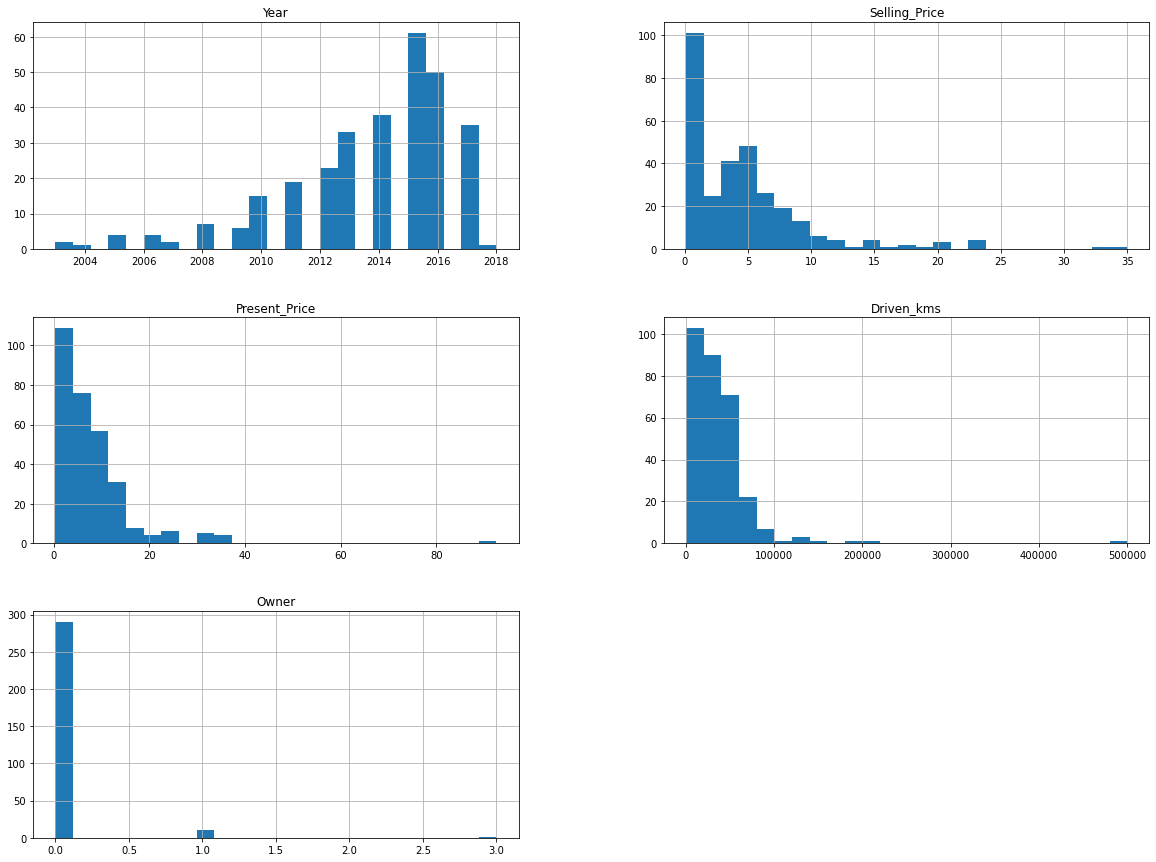

In [6]:
df.hist(bins=25,figsize=(20,15))

In [7]:
display(df[df.Present_Price==df.Present_Price.max()])

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [8]:
display(df[df.Present_Price<20])

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
display(df[df.Selling_Price==df.Selling_Price.max()])

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [10]:
display(df[df.Selling_Price<20])

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Preprocessing

In [11]:
def detect_outliers(df,features,thold):
    outliers_indecies = []
    for c in features :
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3-Q1
        outlier_steps = IQR*thold
        outliers_list_col = df[(df[c]<Q1-outlier_steps)|(df[c]>Q3+outlier_steps)].index
        outliers_indecies.extend(outliers_list_col)
    return outliers_indecies

In [50]:
outliers = detect_outliers(df,["Selling_Price","Present_Price"],1.5)
print(outliers)
cars = df.drop(df.loc[outliers].index,axis=0)
cars

[50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96, 97, 50, 51, 53, 59, 62, 63, 64, 66, 79, 82, 85, 86, 93, 96]


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [51]:
num_attrib = ["Year","Present_Price","Driven_kms","Owner","Selling_Price"]
cat_attrib = ["Fuel_Type","Selling_type","Transmission"]

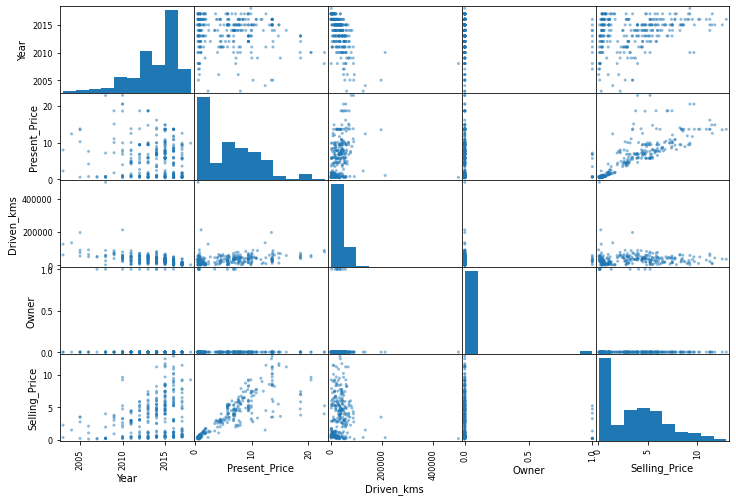

In [52]:
pd.plotting.scatter_matrix(cars[num_attrib],figsize=(12,8))
plt.show()

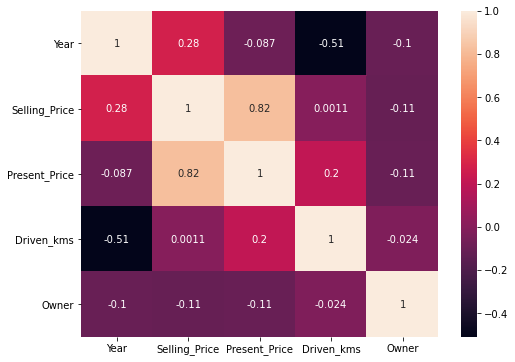

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(cars.corr(),annot=True,cbar=True)
plt.show()

In [54]:
num_attrib.remove("Selling_Price")
num_car = cars[num_attrib] 
cat_car = cars[cat_attrib]
target  = cars["Selling_Price"]

In [55]:
scaler = StandardScaler()
num_car = scaler.fit_transform(num_car)
num_car

array([[ 0.14589185, -0.1079671 , -0.2359811 , -0.19138975],
       [-0.20106103,  0.68308635,  0.18048286, -0.19138975],
       [ 1.18675048,  0.74516902, -0.75916395, -0.19138975],
       ...,
       [-1.58887254,  0.97547573,  1.35006984, -0.19138975],
       [ 1.18675048,  1.27587577, -0.70450306, -0.19138975],
       [ 0.8397976 , -0.04588443, -0.79654159, -0.19138975]])

In [58]:
cars = cars.drop(['Car_Name',"Selling_Price"],axis=1)
cars

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0
1,2013,9.54,43000,Diesel,Dealer,Manual,0
2,2017,9.85,6900,Petrol,Dealer,Manual,0
3,2011,4.15,5200,Petrol,Dealer,Manual,0
4,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0
297,2015,5.90,60000,Petrol,Dealer,Manual,0
298,2009,11.00,87934,Petrol,Dealer,Manual,0
299,2017,12.50,9000,Diesel,Dealer,Manual,0


In [59]:
preprocessing_pipe = ColumnTransformer([
    ("num",StandardScaler(),num_attrib),
    ("cat",OneHotEncoder(),cat_attrib)
])
cars_prepared = preprocessing_pipe.fit_transform(cars)
cars_prepared

array([[ 0.14589185, -0.1079671 , -0.2359811 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.20106103,  0.68308635,  0.18048286, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.18675048,  0.74516902, -0.75916395, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.58887254,  0.97547573,  1.35006984, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.18675048,  1.27587577, -0.70450306, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.8397976 , -0.04588443, -0.79654159, ...,  0.        ,
         0.        ,  1.        ]])

In [60]:
x_train,x_test,y_train,y_test = train_test_split(cars_prepared,target,test_size=20,shuffle=True,random_state=10)

## train model

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [63]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train,y_train)

RandomForestRegressor()

## evaluating model

In [61]:
def model_evaluation (x_train,x_test,y_train,y_test,model):
    
    #prediction
    y_train_pred = model.predict(x_train)
    y_test_pred  = model.predict(x_test)
    
    #train error calculation 
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_R2 = r2_score(y_train, y_train_pred)
    
    #test error calculation 
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_R2 = r2_score(y_test, y_test_pred)
    
    print("Model name: ",model)
    print("MAE  Train: ",train_mae,"\t\tTest: ",test_mae)
    print("RMSE Train: ",train_mse,"\t\tTest: ",test_mse)
    print("R2   Train: ",train_R2,"\t\tTest: ",test_R2)
    print("\n")


In [66]:
model_evaluation(x_train,x_test,y_train,y_test,lin_reg)
model_evaluation(x_train,x_test,y_train,y_test,tree_reg)
model_evaluation(x_train,x_test,y_train,y_test,forest_reg)

Model name:  LinearRegression()
MAE  Train:  0.9084623172375389 		Test:  0.7822205913357865
RMSE Train:  1.4562416406904324 		Test:  1.2366459354655324
R2   Train:  0.8459161708510452 		Test:  0.7926529617256326


Model name:  DecisionTreeRegressor()
MAE  Train:  3.166035241326492e-19 		Test:  0.30050000000000004
RMSE Train:  8.787513054238339e-36 		Test:  0.255345
R2   Train:  1.0 		Test:  0.9571865899771568


Model name:  RandomForestRegressor()
MAE  Train:  0.16782015209125445 		Test:  0.2565099999999995
RMSE Train:  0.0735285782889733 		Test:  0.16715939899999904
R2   Train:  0.9922199966145233 		Test:  0.9719725708803423




In [67]:
predict = forest_reg.predict(x_test[0].reshape(1,-1))
predict

array([2.908])

In [68]:
y_test.to_list()[0]

3.1

In [69]:
y_pred = forest_reg.predict(x_test)

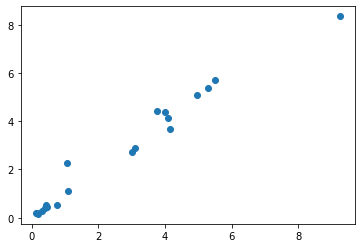

In [70]:
plt.scatter(y_test,y_pred)

In [71]:
residual = y_test-y_pred

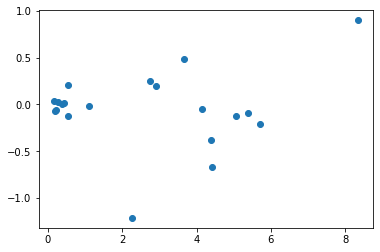

In [72]:
plt.scatter(y_pred,residual)

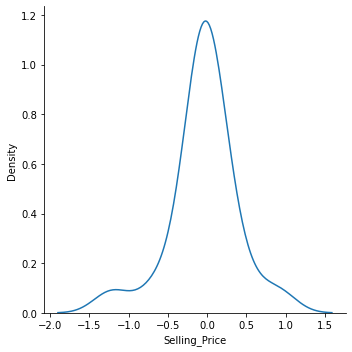

In [73]:
sns.displot(residual,kind="kde")

## predecting new data

In [122]:
pd.DataFrame(cars.iloc[0:1])

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0


In [154]:
forest_reg.predict(preprocessing_pipe.transform(pd.DataFrame(cars.iloc[0:1])))

array([3.6915])

In [141]:
x_x = np.array([['2014', '5.59', '27000', 'Petrol', 'Dealer', 'Manual', '0']])

In [147]:
columns = cars.columns.tolist()

In [152]:
new_val = pd.DataFrame(x_x,columns=columns)
new_val

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,Petrol,Dealer,Manual,0


In [153]:
forest_reg.predict(preprocessing_pipe.transform(new_val))

array([3.6915])

## Save model & preprocessing

In [158]:
#to save
pickle.dump(forest_reg,open("regmodel.pkl","wb"))
#to load
pickle_model = pickle.load(open("regmodel.pkl","rb"))

In [159]:
#to save
pickle.dump(preprocessing_pipe,open("preprocessing.pkl","wb"))
#to load
pickle_prepro = pickle.load(open("preprocessing.pkl","rb"))

In [160]:
pickle_model.predict(pickle_prepro.transform(new_val))

array([3.6915])